In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [26]:
file_path = "../mushroom_network_no_edges.pkl"

with open(file_path, 'rb') as f:
    data = pd.read_pickle(f)

In [27]:
# Print number of nodes
print(f"Number of nodes: {data.number_of_nodes()}")

# Print number of edges
print(f"Number of edges: {data.number_of_edges()}")

# Print node attributes
print("Node attributes:")
count = 0
for node, attrs in data.nodes(data=True):
    print(f"Node {node}: {attrs}")
    count += 1
    if count >= 5:
        break

Number of nodes: 1101
Number of edges: 0
Node attributes:
Node 1: {'mushroom': 'Russula maculata', 'id': 1, 'views_all_time': 9897, 'article': 'https://en.wikipedia.org/wiki/Russula_maculata', 'sporePrintColor': ['yellow', 'ochre'], 'howEdible': [], 'stipeCharacter': ['bare'], 'capShape': ['convex', 'depressed'], 'hymeniumType': ['adnexed', 'free'], 'ecologicalType': ['mycorrhizal'], 'whichGills': ['Gills on hymenium'], 'conservation_status': [], 'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg/250px-1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg', 'Genus': 'Russula', 'Family': 'Russulaceae', 'Order': 'Russulales', 'Class': 'Agaricomycetes', 'Division': 'Basidiomycota', 'Species': 'R.\xa0maculata', 'text': 'Russula maculata is a species of mushroom in the genus Russula . [ 1 ] Its cap ranges from 4–10 centimetres ( 1 + 1 ⁄ 2 –4\xa0in) wide, with hues varying from whitish to red. [ 2 ] It is difficult to

In [28]:
# Print number of entries
print(f"Number of entries in the dataset: {len(data)}")

data

Number of entries in the dataset: 1101


In [29]:
# Get all nodes into a dataframe with their attributes
df = pd.DataFrame.from_dict(dict(data.nodes(data=True)), orient='index')

df = df.reset_index(drop=True)

In [37]:
df.head()

,mushroom,id,views_all_time,article,sporePrintColor,howEdible,stipeCharacter,capShape,hymeniumType,ecologicalType,...,conservation_status,image,Genus,Family,Order,Class,Division,Species,text,wikilinks
0,Russula maculata,1,9897,https://en.wikipedia.org/wiki/Russula_maculata,"[yellow, ochre]",[],[bare],"[convex, depressed]","[adnexed, free]",[mycorrhizal],...,[],https://upload.wikimedia.org/wikipedia/commons...,Russula,Russulaceae,Russulales,Agaricomycetes,Basidiomycota,R. maculata,Russula maculata is a species of mushroom in t...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
1,Russula vinosa,2,14637,https://en.wikipedia.org/wiki/Russula_vinosa,[],[edible],[bare],"[convex, depressed]","[free, adnexed]",[mycorrhizal],...,[],https://upload.wikimedia.org/wikipedia/commons...,Russula,Russulaceae,Russulales,Agaricomycetes,Basidiomycota,R. vinosa,"Russula vinosa , commonly known as the darkeni...",[{'url': 'https://en.wikipedia.org/wiki/Taxono...
2,Gymnopilus pseudofulgens,3,1157,https://en.wikipedia.org/wiki/Gymnopilus_pseud...,[],[],[],[convex],"[adnexed, adnate]",[saprotrophic],...,[],https://upload.wikimedia.org/wikipedia/commons...,Gymnopilus,Hymenogastraceae,Agaricales,Agaricomycetes,Basidiomycota,G. pseudofulgens,Gymnopilus pseudofulgens is a species of mushr...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
3,Gymnopilus josserandii,4,2525,https://en.wikipedia.org/wiki/Gymnopilus_josse...,[ochre],[],[bare],[convex],"[adnexed, adnate]",[saprotrophic],...,[],https://upload.wikimedia.org/wikipedia/commons...,Gymnopilus,Hymenogastraceae,Agaricales,Agaricomycetes,Basidiomycota,G. josserandii,Gymnopilus josserandii is a species of mushroo...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
4,Albatrellus subrubescens,5,35128,https://en.wikipedia.org/wiki/Albatrellus_subr...,[white],[poisonous],[bare],"[convex, flat]",[decurrent],[mycorrhizal],...,[],https://upload.wikimedia.org/wikipedia/commons...,Albatrellus,Albatrellaceae,Russulales,Agaricomycetes,Basidiomycota,A. subrubescens,Albatrellus subrubescens is a species of polyp...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...


In [47]:
df[["mushroom", "views_all_time", "article", "wikilinks"]]

,mushroom,views_all_time,article,wikilinks
0,Russula maculata,9897,https://en.wikipedia.org/wiki/Russula_maculata,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
1,Russula vinosa,14637,https://en.wikipedia.org/wiki/Russula_vinosa,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
2,Gymnopilus pseudofulgens,1157,https://en.wikipedia.org/wiki/Gymnopilus_pseud...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
3,Gymnopilus josserandii,2525,https://en.wikipedia.org/wiki/Gymnopilus_josse...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
4,Albatrellus subrubescens,35128,https://en.wikipedia.org/wiki/Albatrellus_subr...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
...,...,...,...,...
1096,Amanita subpallidorosea,13432,https://en.wikipedia.org/wiki/Amanita_subpalli...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
1097,Lactarius deliciosus,564091,https://en.wikipedia.org/wiki/Lactarius_delici...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
1098,Calocybe indica,72178,https://en.wikipedia.org/wiki/Calocybe_indica,[{'url': 'https://en.wikipedia.org/wiki/Taxono...
1099,Tricholoma pessundatum,6570,https://en.wikipedia.org/wiki/Tricholoma_pessu...,[{'url': 'https://en.wikipedia.org/wiki/Taxono...


In [52]:
def build_wiki_links_network(df):
    """
    Builds an undirected network from a dataframe of mushrooms and wikipedia links.
    """
    
    # 1. PRE-PROCESSING
    # We need to ensure the 'wikilinks' column is a list of dicts, not a string.
    # If read from CSV, it usually loads as a string like "[{'url':...}]"
    def parse_links(x):
        if isinstance(x, str):
            try:
                return ast.literal_eval(x)
            except (ValueError, SyntaxError):
                return []
        return x if isinstance(x, list) else []

    print("Parsing wiki_links column...")
    df['wikilinks_parsed'] = df['wikilinks'].apply(parse_links)

    # 2. CREATE LOOKUP TABLES
    # We only want edges between mushrooms IN our dataset.
    # Create a set of all valid article URLs in this dataset for O(1) lookup.
    valid_urls = set(df['article'])
    
    # Map URLs to Mushroom names (so nodes are named "Russula maculata" instead of "http://...")
    url_to_name = pd.Series(df.mushroom.values, index=df.article).to_dict()

    # 3. BUILD THE GRAPH
    G = nx.Graph()

    print("Adding nodes...")
    # Add all nodes first (to ensure mushrooms with 0 links are still in the graph)
    # We add 'views_all_time' as an attribute, which is useful for sizing nodes later
    for index, row in df.iterrows():
        G.add_node(row['mushroom'], views=row['views_all_time'])

    print("Adding edges...")
    for index, row in df.iterrows():
        source_mushroom = row['mushroom']
        links = row['wikilinks_parsed']
        
        for link in links:
            target_url = link.get('url')
            
            # CRITICAL STEP:
            # Only draw an edge if the target URL is also in our mushroom dataset
            if target_url in valid_urls:
                target_mushroom = url_to_name[target_url]
                
                # Avoid self-loops if a page links to itself
                if source_mushroom != target_mushroom:
                    G.add_edge(source_mushroom, target_mushroom)

    return G

In [55]:
print("Building Graph...")
G = build_wiki_links_network(df)

print(f"Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Building Graph...
Parsing wiki_links column...
Adding nodes...
Adding edges...
Graph built with 1101 nodes and 6039 edges.


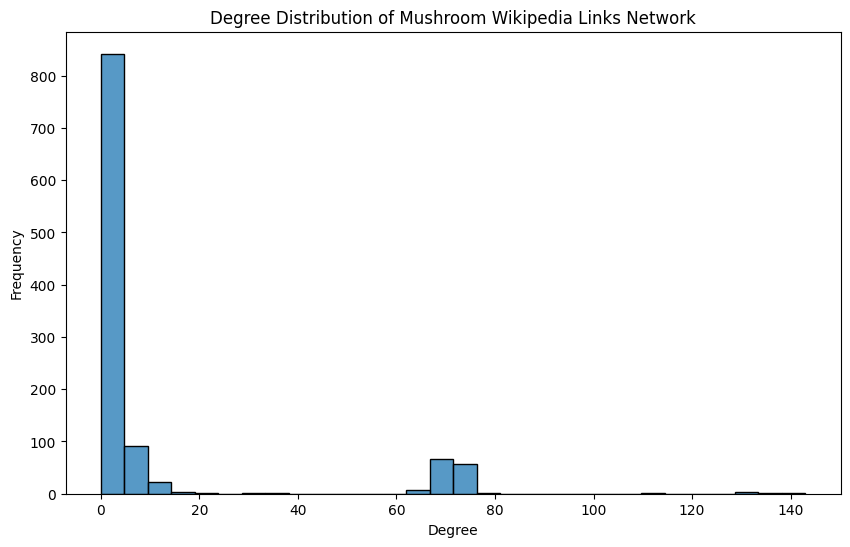

In [56]:
# Plot the degree distribution
degrees = [val for (node, val) in G.degree()]
plt.figure(figsize=(10,6))
sns.histplot(degrees, bins=30, kde=False)
plt.title("Degree Distribution of Mushroom Wikipedia Links Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()